In [1]:
import numpy as np
import matplotlib.pyplot as plt


import cv2
from PIL import Image

import pandas as pd

from pathlib import Path
import os

import multiprocessing as mp

from bs4 import BeautifulSoup
import json

In [120]:

def read_mitk_landmarks(file_name, scale=1.0, mode='def'):
   
    if mode == 'lowercase':
        file_name = file_name.lower()
   
    with open(str(file_name) + '.mps', 'r') as f:
        data = f.read()
   
    xml_data = BeautifulSoup(data, "xml")
    points = xml_data.find_all('point')
   
    landmarks = []

    for p in points:
        if p.find('x').text == '0' and p.find('y').text == '0' and p.find('z').text == '0':
            continue

        x = float(p.find('x').text)*scale
        y = float(p.find('y').text)*scale
        z = float(p.find('z').text)*scale

        landmarks.append(np.asarray([x,y,z]))
       
    f.close()
       
    return landmarks

def vec_length(v):
    return np.sqrt(v[0]**2 + v[1]**2 + v[2]**2)

def create_two_vector_sets(landmarks):
    
    tip = landmarks[0]
    up = landmarks[1]
    down = landmarks[2]
    left = landmarks[3]
    right = landmarks[4]
    end = landmarks[5]

    # Old routine
    center = np.floor((up + down) / 2.0)
    print('Old center: ', center)

    vec_tip = tip - center
    vec_up = up - center
    vec_down = down - center
    vec_left = left - center
    vec_right = right - center 
    vec_end = end - center

    land_vectors = [vec_tip.tolist(), vec_up.tolist(), vec_down.tolist(), vec_left.tolist(), vec_right.tolist(), vec_end.tolist()]

    vec_tip0 = [0,0,vec_length(vec_tip)]
    vec_up0 = [0,-vec_length(vec_up),0]
    vec_down0 = [0,vec_length(vec_down),0]
    vec_left0 = [vec_length(vec_left),0,0]
    vec_right0 = [-vec_length(vec_right),0,0]
    vec_end0 = [0,0,-vec_length(vec_end)]

    norm_vectors = [vec_tip0, vec_up0, vec_down0, vec_left0, vec_right0, vec_end0]
    
    return norm_vectors, land_vectors

In [2]:
path = Path('z:\\tomo\\ershov\\medaka\\')

In [3]:
df = pd.read_excel(open(path / 'evaluation_segmentation.xlsx', 'rb'), sheet_name='all')

In [4]:
df

,line,dataset,Landmarks,Rating,Unnamed: 4
0,NaN,Medaka_817_10-1,NaN,failed,NaN
1,NaN,Medaka_818_10-1,1.0,bad,NaN
2,NaN,Medaka_819_10-1,1.0,good,NaN
3,NaN,Medaka_820_10-1,1.0,failed,NaN
4,NaN,Medaka_1279_104-1,NaN,bad,NaN
...,...,...,...,...,...
352,NaN,Medaka_1227_75-1,2.0,bad,NaN
353,NaN,Medaka_1248_84-2,2.0,norm,NaN
354,NaN,Medaka_1256_84-2,2.0,norm,NaN
355,NaN,Medaka_1257_84-2,2.0,norm,NaN


In [121]:
datasets = df['dataset'].tolist()

NameError: name 'df' is not defined

In [127]:
f = open('dataset_list.txt', 'r')
lines = f.readlines()
datasets = [x.strip() for x in lines]
#print('Selected fish:', lines)
f.close()

print(len(datasets))

221


## Make list for ImageJ

In [124]:
for d in datasets:
    print(f"\"{d}\",")

"Medaka_601_59-2",
"Medaka_603_59-2",
"Medaka_605_59-2",
"Medaka_606_61-1",
"Medaka_608_61-1",
"Medaka_610_61-1",
"Medaka_613_68-1",
"Medaka_614_68-1",
"Medaka_619_68-1",
"Medaka_622_69-1",
"Medaka_626_69-1",
"Medaka_629_69-1",
"Medaka_639_72-1",
"Medaka_640_72-1",
"Medaka_641_72-1",
"Medaka_649_72-2",
"Medaka_652_72-2",
"Medaka_660_72-2",
"Medaka_679_80-1",
"Medaka_684_80-1",
"Medaka_685_80-1",
"Medaka_692_80-2",
"Medaka_699_80-2",
"Medaka_702_80-2",
"Medaka_707_89-1",
"Medaka_709_89-1",
"Medaka_710_89-1",
"Medaka_720_123-2",
"Medaka_721_123-2",
"Medaka_724_123-2",


In [ ]:
def my_funct(x):
    print(x**x)
         
pool = mp.Pool(4)
res = pool.map(my_funct, [1,2,3])



In [ ]:
## Extract line numbers

In [128]:
for d in datasets:
    print(f"{d.split('_')[2]}")

5-1
5-1
5-1
5-1
5-1
5-1
5-1
11-1
11-1
11-1
11-1
11-1
11-1
11-1
11-1
11-1
11-1
18-2
18-2
18-2
18-2
18-2
18-2
18-2
18-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
21-2
23-1
23-1
23-1
23-1
23-1
23-1
23-1
23-1
23-1
29-1
29-1
29-1
29-1
29-1
29-1
29-1
29-1
29-1
29-1
29-1
30-1
30-1
30-1
30-1
30-1
30-1
30-1
30-1
33-1
33-1
33-1
33-1
33-1
33-1
33-1
33-1
39-2
39-2
39-2
39-2
39-2
39-2
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
49-1
50-2
50-2
50-2
50-2
50-2
50-2
50-2
50-2
50-2
50-2
50-2
50-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
58-2
59-2
59-2
59-2
59-2
59-2
59-2
59-2
59-2
59-2
59-2
59-2
61-1
61-1
61-1
61-1
61-1
61-1
61-1
68-1
68-1
68-1
68-1
68-1
68-1
68-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
69-1
72-1
72-1
72-1
72-1
72-1
72-1
72-1
72-2
72-2
72-2
72-2
72-2
72-2
72-2
72-2
72-2
72-2
72-2
72-2
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-1
80-2
80-2
80-2
80-2
80-2
80-2
80-2
80

In [10]:
path_datasets_list = Path("c:\\Users\\fe0968\\Documents\\data\\medaka\\landmarks\\")

f = open(path_datasets_list / 'datasets_201905.txt', 'r')
datasets_201905 = f.readlines()
f.close()

In [15]:
[int(x.split('_')[1]) for x in datasets_201905]

[800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 895,
 897,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 974,
 975,
 976,
 977,
 978,
 979]

## Make a list for ImageJ Labels projects Projections 

In [33]:
lines = ['5-1', '11-1', '18-2', '21-1', '21-2', '23-1', '29-1', '30-1', '32-2', '33-1', '39-2', '49-1', '50-2', '58-2', 
         '59-2', '61-1', '68-1', '69-1', '72-1', '72-2', '80-1', '80-2', '89-1', '123-2']

path = Path('z:\\projects\\code-vita\\Medaka\\2018_11\\')
#[x for x in os.listdir(path)[7:-20]]
datasets = [x for x in os.listdir(path)[7:-20] if (x.split('_')[2] in lines)]
print('Total folders:', len(datasets))

datasets = [x for x in os.listdir(path)[7:-20] if (x.split('_')[2] in lines) and os.path.isfile(path / x / 'brain_scaled_0.5_8bit_slices.tif')]
print('Total segmentations are done:', len(datasets))

missing_datasets = [x for x in os.listdir(path)[7:-20] if (x.split('_')[2] in lines) and not os.path.isfile(path / x / 'brain_scaled_0.5_8bit_slices.tif')]
print('Missing segmnentations:', missing_datasets)


Total folders: 228
Total segmentations are done: 226
Missing segmnentations: ['Medaka_432_11-1', 'Medaka_676_80-1']


['Medaka_401_32-2_large',
 'Medaka_402_32-2_large',
 'Medaka_403_32-2_large',
 'Medaka_404_32-2_large',
 'Medaka_405_32-2_large',
 'Medaka_410_5-1',
 'Medaka_411_5-1',
 'Medaka_414_5-1',
 'Medaka_415_5-1',
 'Medaka_417_5-1',
 'Medaka_418_5-1',
 'Medaka_419_5-1',
 'Medaka_420_5-1',
 'Medaka_421_5-1',
 'Medaka_423_11-1',
 'Medaka_424_11-1',
 'Medaka_425_11-1',
 'Medaka_426_11-1',
 'Medaka_427_11-1',
 'Medaka_428_11-1',
 'Medaka_431_11-1',
 'Medaka_432_11-1',
 'Medaka_436_11-1',
 'Medaka_437_11-1',
 'Medaka_444_18-2',
 'Medaka_445_18-2',
 'Medaka_446_18-2',
 'Medaka_447_18-2',
 'Medaka_448_18-2',
 'Medaka_449_18-2',
 'Medaka_450_18-2',
 'Medaka_451_18-2',
 'Medaka_452_21-2',
 'Medaka_453_21-2',
 'Medaka_454_21-2',
 'Medaka_455_21-2',
 'Medaka_456_21-2',
 'Medaka_458_21-2',
 'Medaka_459_21-2',
 'Medaka_460_21-2',
 'Medaka_461_21-2',
 'Medaka_462_21-2',
 'Medaka_463_21-2',
 'Medaka_464_21-2',
 'Medaka_465_21-2',
 'Medaka_466_21-2',
 'Medaka_468_23-1',
 'Medaka_469_23-1',
 'Medaka_470_23-1',

In [26]:
for d in datasets:
    print(f"\"{d}\",")

"Medaka_401_32-2_large",
"Medaka_402_32-2_large",
"Medaka_403_32-2_large",
"Medaka_404_32-2_large",
"Medaka_405_32-2_large",
"Medaka_410_5-1",
"Medaka_411_5-1",
"Medaka_414_5-1",
"Medaka_415_5-1",
"Medaka_417_5-1",
"Medaka_418_5-1",
"Medaka_419_5-1",
"Medaka_420_5-1",
"Medaka_421_5-1",
"Medaka_423_11-1",
"Medaka_424_11-1",
"Medaka_425_11-1",
"Medaka_426_11-1",
"Medaka_427_11-1",
"Medaka_428_11-1",
"Medaka_431_11-1",
"Medaka_432_11-1",
"Medaka_436_11-1",
"Medaka_437_11-1",
"Medaka_444_18-2",
"Medaka_445_18-2",
"Medaka_446_18-2",
"Medaka_447_18-2",
"Medaka_448_18-2",
"Medaka_449_18-2",
"Medaka_450_18-2",
"Medaka_451_18-2",
"Medaka_452_21-2",
"Medaka_453_21-2",
"Medaka_454_21-2",
"Medaka_455_21-2",
"Medaka_456_21-2",
"Medaka_458_21-2",
"Medaka_459_21-2",
"Medaka_460_21-2",
"Medaka_461_21-2",
"Medaka_462_21-2",
"Medaka_463_21-2",
"Medaka_464_21-2",
"Medaka_465_21-2",
"Medaka_466_21-2",
"Medaka_468_23-1",
"Medaka_469_23-1",
"Medaka_470_23-1",
"Medaka_471_23-1",
"Medaka_472_23-1",
"Medaka_47

In [28]:
for d in datasets:
    print(f"{d}")

Medaka_401_32-2_large
Medaka_402_32-2_large
Medaka_403_32-2_large
Medaka_404_32-2_large
Medaka_405_32-2_large
Medaka_410_5-1
Medaka_411_5-1
Medaka_414_5-1
Medaka_415_5-1
Medaka_417_5-1
Medaka_418_5-1
Medaka_419_5-1
Medaka_420_5-1
Medaka_421_5-1
Medaka_423_11-1
Medaka_424_11-1
Medaka_425_11-1
Medaka_426_11-1
Medaka_427_11-1
Medaka_428_11-1
Medaka_431_11-1
Medaka_432_11-1
Medaka_436_11-1
Medaka_437_11-1
Medaka_444_18-2
Medaka_445_18-2
Medaka_446_18-2
Medaka_447_18-2
Medaka_448_18-2
Medaka_449_18-2
Medaka_450_18-2
Medaka_451_18-2
Medaka_452_21-2
Medaka_453_21-2
Medaka_454_21-2
Medaka_455_21-2
Medaka_456_21-2
Medaka_458_21-2
Medaka_459_21-2
Medaka_460_21-2
Medaka_461_21-2
Medaka_462_21-2
Medaka_463_21-2
Medaka_464_21-2
Medaka_465_21-2
Medaka_466_21-2
Medaka_468_23-1
Medaka_469_23-1
Medaka_470_23-1
Medaka_471_23-1
Medaka_472_23-1
Medaka_473_23-1
Medaka_474_23-1
Medaka_475_23-1
Medaka_476_23-1
Medaka_483_29-1
Medaka_484_29-1
Medaka_485_29-1
Medaka_486_29-1
Medaka_487_29-1
Medaka_488_29-1
Med

In [8]:
from sympy import Point, Line

In [9]:
p1, p2, p3 = Point(0, 0), Point(1, 1), Point(7, 7) 
l1 = Line(p1, p2) 
  
# using intersection() method 
showIntersection = l1.intersection(p3) 
  
print(showIntersection)

[Point2D(7, 7)]


In [11]:
showIntersection[0].x

7

In [40]:
l1 = Line(Point(1,2,0), Point(5,6,0))
l2 = Line(Point(2,6,0), Point(5,4,0))

inter = l1.intersection(l2)

In [41]:
inter

[Point3D(19/5, 24/5, 0)]

In [45]:
x = inter[0].x.evalf()

In [46]:
y = inter[0].y.evalf()

In [47]:
print(x+y)

8.60000000000000


In [48]:
inter[0].z.evalf()

0

In [49]:
from Geometry3D import *

In [87]:
l1 = Line(Point(1,2,1), Point(5,6,1))
l2 = Line(Point(2,6,1), Point(5,4,1))

s1 = Segment(Point(1,2,0), Point(5,6,0))
s2 = Segment(Point(2,6,0), Point(5,4,0))

#inter = intersection(l2, l2)
intersection(s1,s2)


Point(3.8, 4.8, 0.0)

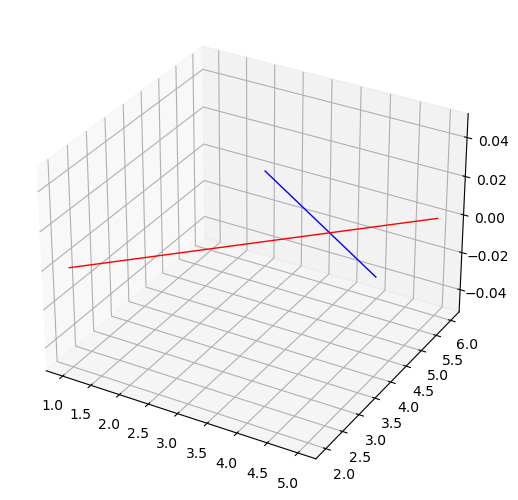

In [69]:
r = Renderer()
r.add((s1,'r',1),normal_length = 0)
r.add((s2,'b',1),normal_length=0)
r.show()

In [117]:
path = Path('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\landmarks_mitk2\\')
#land = read_mitk_landmarks(path / '423')

files = os.listdir(path)

In [118]:
#files = ['423.mps']

for f in files:
    
    name = f.split('.')[0]
    print(name)
    land = read_mitk_landmarks(path / name)

    tip = land[0]
    up = land[1]
    down = land[2]
    left = land[3]
    right = land[4]
    end = land[5]

    set_eps(1e-0)

    line_tip_end = Segment(Point(tip[0], tip[1], tip[2]), Point(end[0], end[1], end[2]))
    line_up_down = Segment(Point(up[0], up[1], up[2]), Point(down[0], down[1], down[2]))

    p1 = intersection(line_tip_end, line_up_down)

    line_left_right = Segment(Point(left[0], left[1], left[2]), Point(right[0], right[1], right[2]))

    p2 = intersection(line_tip_end, line_left_right)

    p3 = intersection(line_up_down, line_left_right)

    center_m = np.asarray([np.mean([p1[0], p2[0], p3[0]]), np.mean([p1[1], p2[1], p3[1]]), np.mean([p1[2], p2[2], p3[2]])])
    center_std = np.asarray([np.std([p1[0], p2[0], p3[0]]), np.std([p1[1], p2[1], p3[1]]), np.std([p1[2], p2[2], p3[2]])])

    print('Mean', center_m)
    print('Std', center_std)
    print()

#inter_point
#s1 = Segment(Point(tip[0],tip[1],tip[2]), Point(5,6,0))



1300
Mean [ 175.26782914  274.4397985  1341.30848258]
Std [0.01700992 0.04813811 0.0874021 ]

1305
Mean [ 236.68557646  270.0367949  1327.73552125]
Std [0.03673081 0.04132197 0.07243779]

1310
Mean [ 268.81958329  212.31395453 1317.2732315 ]
Std [0.00831009 0.00712101 0.04108288]

1320
Mean [ 267.1195634   254.76734626 1392.45090887]
Std [0.02016856 0.00896548 0.0890398 ]

1321
Mean [ 245.94997681  198.23776879 1445.73303388]
Std [0.07493897 0.04420057 0.19455463]

1323
Mean [ 297.87666896  253.00560878 1427.35220466]
Std [0.05521933 0.04076414 0.08160446]

1337
Mean [ 275.02780858  310.42381824 1239.21084727]
Std [0.00382219 0.0067999  0.01502179]

1338
Mean [ 241.87191477  253.24816606 1392.07398979]
Std [0.0500805  0.17335147 0.01880119]

1341
Mean [ 299.70955684  270.15451842 1360.54894687]
Std [0.04645261 0.02326399 0.01758186]

1346
Mean [ 215.77565536  249.69955839 1403.00484773]
Std [0.00515162 0.04054399 0.0065302 ]

1351
Mean [ 272.40200659  212.38718041 1444.71323139]
Std [0

In [101]:
p1

Point(252.52957590833307, 219.66013978933682, 623.8993683867043)

In [96]:
1e-0

1.0

In [22]:
path = Path('z:\\tomo\\ershov\\medaka\\workshop_landmarks\\')
#land = read_mitk_landmarks(path / '423')

files1 = os.listdir(path / 'data')
files2 = os.listdir(path / 'data2')
files3 = os.listdir(path / 'data_part09')
files4 = os.listdir(path / 'data_part10')
files5 = os.listdir(path / 'data_part11')

files = files1 + files2 + files3 + files4 + files5

files = [x.split('.')[0] for x in files]
len(files)
#files[1]

221

In [21]:
f = open(path / 'selected_datasets.txt', 'r')
lines = f.readlines()
f.close()

datasets = [x.split('_')[1] for x in lines]
len(datasets)
#datasets[1]

222

In [26]:
[x for x in datasets if x not in files]

['1412']